iter 0: cur_l=320.9323391520877
iter 1000: cur_l=267.1016003783441
iter 2000: cur_l=266.29655385295194
iter 3000: cur_l=265.0505449504385
iter 4000: cur_l=265.0505449504385
iter 5000: cur_l=265.05054495043845
iter 6000: cur_l=265.05054495043845
iter 7000: cur_l=265.0505449504385
iter 8000: cur_l=265.05054495043845
iter 9000: cur_l=265.0505449504385
[0, 8, 7, 9, 2, 4, 6, 1, 3, 5]


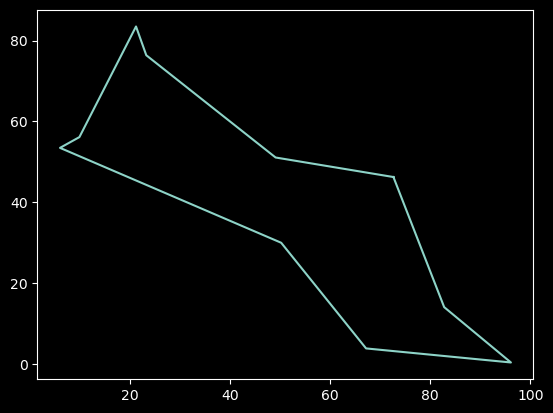

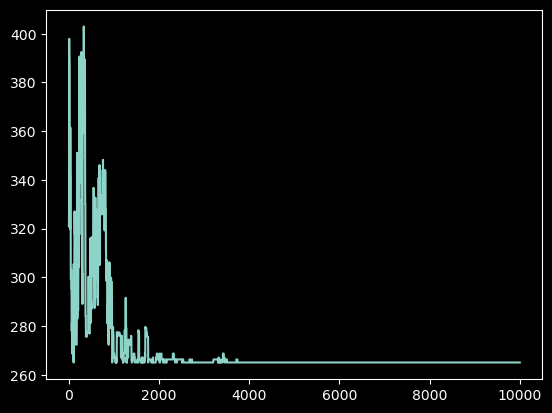

In [1]:
# 模拟退火算法
import random
import math
# 导入自定义工具包，其中可能包含 calc、greedy 和 plot_ans 等函数
from util import *
import matplotlib.pyplot as plt

# 从文件 'points.json' 中读取数据
with open(file='points.json', mode="r") as f:
    txt = f.readline()
# 使用 json.loads() 函数将读取的 JSON 格式字符串转换为 Python 对象
points = json.loads(txt)

# 获取点的数量
N = len(points)

# 使用贪心算法从点 0 开始生成初始路径
last = greedy(0, points)# greedy 函数返回一个列表，表示从点 0 开始的最优路径

# 生成新路径的函数，通过交换路径中部分节点的顺序来得到新路径
def perm(ans):
    # 随机选择两个索引 i 和 j，范围在 1 到 N - 1 之间
    i = random.randint(1, N - 1)
    j = random.randint(1, N - 1)
    # 确保 i 小于 j
    if i > j:
        i, j = j, i
    # 将 ans 中索引从 i 到 j 的部分反转，生成新的路径
    ans = ans[:i] + ans[j:i - 1:-1] + ans[j + 1:]
    return ans

# 用于记录每一次迭代时当前路径的长度
rec = []# 初始化

# 初始温度
T = 20
# 温度衰减系数
alpha = 0.999
# 计算当前路径的长度
cur_l = calc(last, points)    # calc 函数返回路径的长度
# 初始化最优路径为当前路径
best = last

# 进行 10000 次迭代
for iter in range(10000):
    # 生成一个新的路径
    tmp = perm(last)
    # 计算新路径的长度
    new_l = calc(tmp, points)
    # 如果新路径的长度小于当前路径的长度
    if new_l < cur_l:
        # 更新当前路径为新路径
        last = tmp
        # 更新最优路径为新路径
        best = tmp
        # 更新当前路径的长度
        cur_l = new_l
    else:
        # 生成一个 0 到 1 之间的随机数
        rand = random.random()
        # 根据 Metropolis 准则判断是否接受更差的解
        if rand < math.exp(-(new_l - cur_l) / T):
            # 如果满足条件，更新当前路径为新路径
            last = tmp
            # 更新当前路径的长度
            cur_l = new_l
    # 温度按照衰减系数进行衰减
    T *= alpha
    # 记录当前路径的长度
    rec.append(cur_l) #rac.append(cur_l)函数将当前路径的长度添加到列表rec中
    # 每 1000 次迭代打印一次当前迭代次数和当前路径的长度
    if iter % 1000 == 0:
        print("iter {}: cur_l={}".format(iter, cur_l))

# 最终的最优路径
ans = best
# 打印最优路径
print(ans)

# 绘制最优路径
plot_ans(ans, points)
# 绘制每一次迭代时当前路径长度的变化曲线
plt.plot(rec)
# 显示图形
plt.show()